In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load Data from Transactions Sheet

In [2]:
df = pd.read_excel('KPMG_VI_Data.xlsx', sheet_name = "Transactions")

In [3]:
df.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145


**Remove the top row with the disclaimer**

In [4]:
df.columns = df.iloc[0]
df = df[1:]

In [5]:
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226


**Check and Remove duplicate data**

In [6]:
df.duplicated().sum()

0

**No duplicated data!**

In [7]:
df.describe()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
count,20000,20000,20000,20000,19640,20000,19803,19803,19803,19803,20000.00,19803.00,19803
unique,20000,101,3494,364,2,2,6,4,3,3,296.00,103.00,100
top,20000,0,2476,2017-02-14 00:00:00,True,Approved,Solex,Standard,medium,medium,2091.47,388.92,33879
freq,1,1378,14,82,9829,19821,4253,14176,13826,12990,465.00,465.00,234


**The number of data points is inconsistent, there must be missing data**

In [8]:
df.isnull().sum()

0
transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

**Convert column 'product_first_sold_date' data into readable date**

In [9]:
df['product_first_sold_date'] = pd.to_datetime(df['product_first_sold_date']).dt.date

In [10]:
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,1970-01-01
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,1970-01-01


### Load Data from New Customer List Sheet

In [11]:
new_customer = pd.read_excel('KPMG_VI_Data.xlsx', sheet_name = "NewCustomerList")

In [12]:
new_customer.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,1.03,1.2875,1.609375,1.367969,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.78,0.7800,0.975000,0.828750,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.65,0.6500,0.650000,0.650000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.98,1.2250,1.225000,1.225000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.78,0.7800,0.975000,0.975000,4,4,1.703125


I was going to delete the first row. However, I did it directly in the excel file since if I used the cell below I would've ended up with NaN as my labels instead of the Unnamed columns seen above. Functions for replacing NaNs in the label do not work. As data, those functions will work but to get a scan for equality with NaN, it does not make sense since np.nan == np.nan returns false. 

*To avoid all of this, I could just delete the columns before I delete the row since at least the names are stings.*

In [13]:
#new_customer.columns = new_customer.iloc[0]
#new_customer = new_customer[1:]
#Five columns are NaN
#new_customer.fillna("Delete_this_anyways", axis = 1)

**Delete Columns with no label**

In [14]:
col = ['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20']
new_customer.drop(col, axis = 1, inplace = True)

In [15]:
new_customer.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [16]:
new_customer.duplicated().sum()

0

In [21]:
new_customer.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

**No Last Name is fine, plenty of identification information available**

In [18]:
new_customer.gender.value_counts()

Female    513
Male      470
U          17
Name: gender, dtype: int64

U is unspecified

In [19]:
new_customer.gender.replace("U", "Unspecified")

0        Male
1        Male
2      Female
3      Female
4      Female
        ...  
995      Male
996      Male
997    Female
998      Male
999      Male
Name: gender, Length: 1000, dtype: object

In [20]:
new_customer.DOB.fillna("Unknown")

0      1957-07-12 00:00:00
1      1970-03-22 00:00:00
2      1974-08-28 00:00:00
3      1979-01-28 00:00:00
4      1965-09-21 00:00:00
              ...         
995    1959-10-07 00:00:00
996    2001-10-17 00:00:00
997    1954-10-05 00:00:00
998    1952-12-17 00:00:00
999    1955-10-02 00:00:00
Name: DOB, Length: 1000, dtype: object

In [22]:
new_customer.DOB.dt.date

0      1957-07-12
1      1970-03-22
2      1974-08-28
3      1979-01-28
4      1965-09-21
          ...    
995    1959-10-07
996    2001-10-17
997    1954-10-05
998    1952-12-17
999    1955-10-02
Name: DOB, Length: 1000, dtype: object

### Load in Data from Customer Demographic Sheet

In [24]:
customer = pd.read_excel('KPMG_VI_Data.xlsx', sheet_name = "CustomerDemographic")

In [25]:
customer.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
4,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7


In [29]:
customer.columns = customer.iloc[0]
customer = customer[1:]

The default values column does not make any sense

In [30]:
customer.drop(['default'], axis = 1)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,Yes,16
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,Yes,15
4,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,No,7
5,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,Yes,8
...,...,...,...,...,...,...,...,...,...,...,...,...
3996,3996,Rosalia,Halgarth,Female,8,1975-08-09 00:00:00,VP Product Management,Health,Mass Customer,N,No,19
3997,3997,Blanch,Nisuis,Female,87,2001-07-13 00:00:00,Statistician II,Manufacturing,High Net Worth,N,Yes,1
3998,3998,Sarene,Woolley,U,60,NaN,Assistant Manager,IT,High Net Worth,N,No,NaN
3999,3999,Patrizius,NaN,Male,11,1973-10-24 00:00:00,NaN,Manufacturing,Affluent Customer,N,Yes,10


# Part 2

In [1]:
import pandas as pd
import numpy as np
import datetime
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import warnings
import math as ma
warnings.filterwarnings("ignore")

In [2]:
xls = pd.ExcelFile('KPMG_VI_Data.xlsx')
df = pd.read_excel(xls, 'CustomerDemographic')

In [3]:
df.columns

Index(['Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only. ',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12'],
      dtype='object')

In [4]:
# remove first row and rename for simplicity
df.rename(columns={"Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only. ":"customer_id"}, inplace = True)
df.rename(columns={"Unnamed: 1":"fname",
                   "Unnamed: 2":"lname",
                   "Unnamed: 3":"gender",
                   "Unnamed: 4":"3y_bike_purchases",
                   "Unnamed: 5":"DOB",
                   "Unnamed: 6":"JT"}, inplace = True)
df.rename(columns={"Unnamed: 7":"Category",
                   "Unnamed: 8":"wealth_segement",
                   "Unnamed: 9":"D_Indicator",
                   "Unnamed: 10":"default",
                   "Unnamed: 11":"owns_car",
                   "Unnamed: 12":"tencure"}, inplace = True)
df=df.iloc[1:]
df

,customer_id,fname,lname,gender,3y_bike_purchases,DOB,JT,Category,wealth_segement,D_Indicator,default,owns_car,tencure
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
4,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7
5,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3996,3996,Rosalia,Halgarth,Female,8,1975-08-09 00:00:00,VP Product Management,Health,Mass Customer,N,-100,No,19
3997,3997,Blanch,Nisuis,Female,87,2001-07-13 00:00:00,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1
3998,3998,Sarene,Woolley,U,60,NaN,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN
3999,3999,Patrizius,NaN,Male,11,1973-10-24 00:00:00,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10


In [6]:
def check_NA():
    exit = []
    temp = list(df)
    for each in temp:
        exit.append(df[each].isna().sum())
    return exit

NaNlist = check_NA()
print(NaNlist, len(NaNlist))


# need to check columns
check = []
k = -1
for i in NaNlist:
    k += 1
    if i > 0:
        check.append(k)
        
def check_unique():
    temp = list(df)
    mydict = {}
    for i in range(3, 13):
        ct = 0
        if NaNlist[i] > 0:
            ct = len(df[temp[i]].unique()) - 1
        else:
            ct = len(df[temp[i]].unique())
        mydict[temp[i]] = (ct, df[temp[i]].unique())
    return mydict

[0, 0, 125, 0, 0, 87, 506, 656, 0, 0, 302, 0, 87] 13


In [12]:
#first is Female, second if Male, third is Unknown
gender = [0,0,0] 

for each in df['gender']:
    if each[0] == "F":
        gender[0] += 1
    elif each[0] == "M":
        gender[1] += 1
    else:
        gender[2] += 1


def gf(x, pos):
    """
    
    x is value and pos is gender
    
    """
    return int(x)

#first is Female, second if Male, third is Unknown
bike = [0,0,0]

bike[0] += df['3y_bike_purchases'][df['gender'] == 'Female'].sum() + df['3y_bike_purchases'][df['gender'] == 'F'].sum()
bike[1] += df['3y_bike_purchases'][df['gender'] == 'Male'].sum() + df['3y_bike_purchases'][df['gender'] == 'M'].sum()
bike[2] += df['3y_bike_purchases'][df['gender'] == 'U'].sum()

grapho = [gender[0], bike[0], gender[1], bike[1], gender[2], bike[2]]
graphl = [gender[0]*10, bike[0], gender[1]*10, bike[1], gender[2]*10, bike[2]]
colorr = (0.3,0.1,0.4,0.6)

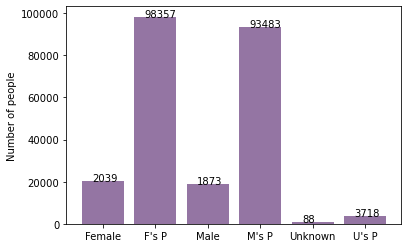

In [15]:
formatter = FuncFormatter(gf)
x = np.arange(6)
fig, ax = plt.subplots()
ax.set_ylabel('Number of people')
ax.yaxis.set_major_formatter(formatter)
plt.bar(x, graphl, color = colorr)
for i in range(len(gender*2)):
    plt.text(x = i-0.2, y = graphl[i]+0.1, s = grapho[i], size = 10)

plt.xticks(x, ('Female', "F's P", 'Male', "M's P", 'Unknown', "U's P"))
plt.show()

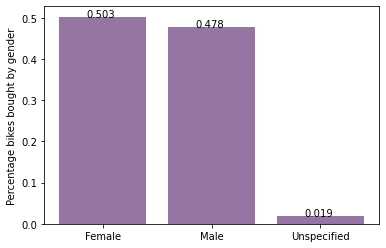

In [16]:
avg  = [0,0,0]
ss   = sum(bike)
for i in range(len(avg)):
    avg[i] += round(bike[i]/ss,3) 

x1 = np.arange(3)
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Percentage bikes bought by gender')
plt.bar(x1, avg, color = colorr)
for i in range(len(avg)):
    plt.text(x = i-0.15, y = avg[i], s = avg[i], size = 10)

plt.xticks(x1, ('Female', 'Male', 'Unspecified'))
plt.show()